In [40]:
#Read Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import skew

In [57]:
#Reading Our datasets
train = pd.read_csv('drive/MyDrive/Colab Notebooks/Train.csv')
test = pd.read_csv('drive/MyDrive/Colab Notebooks/Test.csv')
vdefinition = pd.read_csv('drive/MyDrive/Colab Notebooks/variable_descriptions.csv')

**Variables Used in this Project**

---



In [58]:
#Since some variables in our dataset are abbriviated. Here is our variable definitions before you go through our insights.
vdefinition

,Column,Description
0,total_households,Totoal number of households in ward
1,total_individuals,Total number of individuals in ward
2,target_pct_vunerable,Percentage of large households who have to lea...
3,dw_00,Percentage of dwellings of type: House or bric...
4,dw_01,Percentage of dwellings of type: Traditional d...
5,dw_02,Percentage of dwellings of type: Flat or apart...
6,dw_03,Percentage of dwellings of type: Cluster house...
7,dw_04,Percentage of dwellings of type: Townhouse (se...
8,dw_05,Percentage of dwellings of type: Semi-detached...
9,dw_06,Percentage of dwellings of type: House/flat/ro...


**Our First Datasets (Training and Testing)**

In [59]:
#Displaying our Train Data
df = pd.DataFrame(data=train)
df
# target_pct_vunerable variable is a label, since we are using a supervised learning we need to train our dataset using a labeled dataset.

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,0.044411,0.360511,0.004950,0.000848,0.006711,0,0,0.192690,0.626544,0.000396,0.071214,0.109157,0.275335,0.724665,0.343501,0.656499,0.326122,0.673878,0.012956,0.482007,0.009574,0.109440,0.299974,0.001880,0.015047,0.004691,0.003556,0.003843,0.000787,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,0.231013,0.289105,0.025454,0.000289,0.007050,0,0,0.165663,0.701452,0.000713,0.016803,0.115370,0.059933,0.940067,0.080532,0.919468,0.033706,0.966294,0.003241,0.013292,0.010543,0.233694,0.486355,0.029286,0.111983,0.011787,0.004042,0.010961,0.005768,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,0.132829,0.001320,0.002305,0.000849,0.006466,0,0,0.293674,0.534299,0.000397,0.027582,0.144048,0.169733,0.830267,0.108760,0.891240,0.056128,0.943872,0.008827,0.019836,0.004155,0.220034,0.077659,0.002389,0.560416,0.018953,0.010277,0.004701,0.002755,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0,0,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0,0,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,HFWMU2J,703.70893,2757.17876,3.500868,0.816469,0.070643,0.003699,0.004518,0.000000,0.000000,0.001433,0.006391,0.049242,0.011097,0.012207,0.024301,0,0,0.215378,0.648514,0.000000,0.015256,0.120853,0.186006,0.813994,0.278325,0.721675,0.026363,0.973637,0.983206,0.005568,0.000422,0.000903,0.000481,0.001384,0.000903,0.001795,0.000903,0.000422,0.000873,0.000000,0.000962,0,0.002176,0.032270,0.924304,0.002366,0.035771,0.005288,0.691621
3170,8LVBHRG,8265.55628,29868.09873,0.116460,0.913623,0.000397,0.001184,0.000270,0.000124,0.000862,0.025582,0.015723,0.037453,0.001375,0.000000,0.003407,0,0,0.292636,0.533827,0.000707,0.080066,0.092764,0.452699,0.547301,0.380879,0.619121,0.166724,0.833276,0.002240,0.021769,0.024921,0.008089,0.036519,0.054329,0.028624,0.743253,0.002812,0.007738,0.005607,0.050325,0.012501,0,0.001272,0.995016,0.001392,0.000869,0.000366,0.002357,0.980561
3171,5WDYHUG,6338.67028,29458.48566,0.958828,0.758389,0.017707,0.037914,0.001091,0.001560,0.000168,0.010662,0.033981,0.132129,0.001966,0.000168,0.004266,0,0,0.235334,0.565402,0.000429,0.105054,0.093781,0.270922,0.729078,0.149104,0.850896,0.170906,0.829094,0.001822,0.016134,0.010802,0.011579,0.936921,0.001747,0.007378,0.004386,0.005457,0.000543,0.000249,0.000725,0.002257,0,0.000000

In [60]:
#Displaying Our Test Data
dt = pd.DataFrame(data=test)
dt
#this is a testing dataset, it is not labeled.

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,00A93O0,2514.04172,8037.06199,0.671962,0.061074,0.101516,0.006891,0.021287,0.015615,0.035974,0.010995,0.030665,0.000563,0.004513,0.038943,0,0,0.327785,0.400204,0.000142,0.090634,0.181234,0.082473,0.917527,0.170320,0.829680,0.028193,0.971807,0.006861,0.025960,0.001401,0.864523,0.010393,0.001966,0.004094,0.000991,0.007919,0.000136,0.000146,0.000420,0.011485,0,0.063705,0.979272,0.009926,0.003224,0.002697,0.004882,0.521007
1,01V40KO,1829.71944,7494.86917,0.542857,0.390850,0.039623,0.000000,0.000000,0.000000,0.002633,0.005074,0.010439,0.000000,0.000544,0.007980,0,0,0.396451,0.448673,0.002026,0.015543,0.137307,0.028539,0.971461,0.087096,0.912904,0.014139,0.985861,0.003348,0.008866,0.001654,0.968007,0.005108,0.002472,0.001524,0.001974,0.006575,0.000152,0.000160,0.000000,0.000160,0,0.000000,0.998938,0.000296,0.000301,0.000305,0.000160,0.693716
2,01ZHVW0,1721.99009,5847.43254,0.968071,0.003525,0.001431,0.000000,0.000000,0.000000,0.018546,0.004769,0.000825,0.000000,0.000000,0.002832,0,0,0.315332,0.550687,0.000000,0.009654,0.124326,0.108260,0.891740,0.115144,0.884856,0.047064,0.952936,0.037169,0.019334,0.001471,0.918999,0.003145,0.001087,0.001963,0.001543,0.005908,0.000000,0.002075,0.000631,0.006504,0,0.000171,0.955895,0.012170,0.000000,0.030012,0.001923,0.933954
3,028YQJX,12388.02257,52211.66859,0.397274,0.004734,0.001068,0.000279,0.000799,0.197760,0.005227,0.065487,0.316633,0.003892,0.000279,0.006569,0,0,0.242343,0.568208,0.001050,0.066225,0.122174,0.146214,0.853786,0.223657,0.776343,0.174330,0.825670,0.485175,0.240164,0.002869,0.242053,0.003676,0.000726,0.008142,0.003545,0.003591,0.000629,0.000505,0.000593,0.008330,0,0.000000,0.293629,0.694779,0.003238,0.000628,0.007726,0.921470
4,02G8W11,1754.25716,4266.57609,0.815197,0.016697,0.078571,0.008975,0.047882,0.015398,0.007264,0.000000,0.000712,0.007003,0.000877,0.001425,0,0,0.110625,0.663775,0.000000,0.024673,0.200927,0.723028,0.276972,0.930886,0.069114,0.808671,0.191329,0.457734,0.334764,0.000843,0.005681,0.001384,0.000000,0.002514,0.000829,0.000284,0.000290,0.000000,0.000234,0.016846,0,0.178598,0.110861,0.054114,0.006062,0.823495,0.005470,0.996227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,ZV3KA4K,1871.18898,6946.20305,0.226464,0.629322,0.039062,0.001706,0.001052,0.001353,0.008017,0.009431,0.036383,0.006669,0.002109,0.038431,0,0,0.334878,0.469562,0.000170,0.069992,0.125398,0.154493,0.845507,0.172786,0.827214,0.057982,0.942018,0.073606,0.036120,0.003405,0.778058,0.004333,0.003082,0.073644,0.001818,0.005974,0.000164,0.000000,0.000000,0.006982,0,0.012813,0.904646,0.034943,0.002611,0.055046,0.002753,0.256395
1098,ZV99Z7P,2164.66856,5974.39531,0.738136,0.003566,0.005022,0.000000,0.001936,0.000000,0.003351,0.232637,0.002122,0.007532,0.000575,0.005124,0,0,0.215441,0.631586,0.000000,0.038757,0.114216,0.201709,0.798291,0.120893,0.879107,0.021724,0.978276,0.024311,0.034020,0.007054,0.844889,0.010083,0.005908,0.013570,0.003205,0.006596,0.000867,0.000188,0.008148,0.041159,0,0.000000,0.965275,0.012481,0.000823,0.000627,0.020794,0.989622
1099,ZVO9F7A,3822.71308,13000.22241,0.927417,0.000890,0.012602,0.000859,0.000669,0.003711,0.029519,0.013913,0.005645,0.001181,0.000599,0.002995,0,0,0.328053,0.515934,0.000000,0.037311,0.118702,0.145487,0.854513,0.120380,0.879620,0.039948,0.960052,0.006107,0.065649,0.001820,0.897004,0.002412,0.000769,0.003713,0.001226,0.006926,0.000085,0.000694,0.000431,0.006319,0,0.006846,0.993986,0.001846,0.000673,0.000468,0.003028,0.938536
1100,ZVVA1LV,2075.42181,10280.57452,0.410837

**Data Cleaning, Analysis & Visualizing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households per Ward')

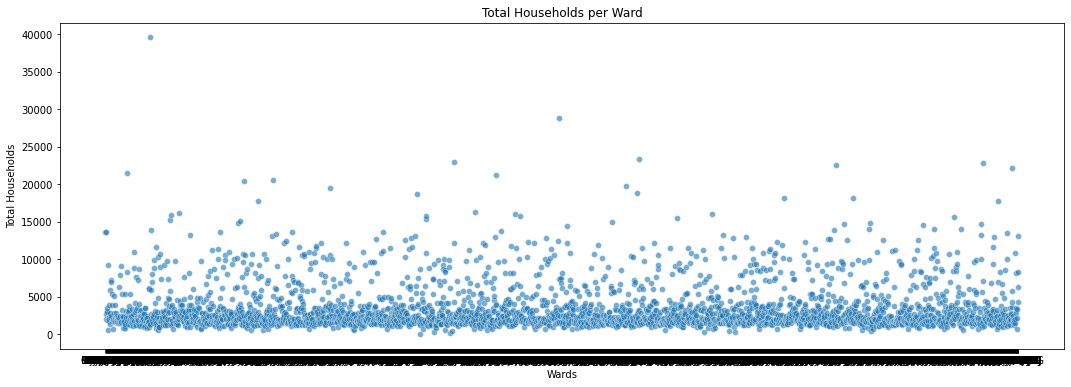

In [61]:
#Plotting a Scatter Plot for the Train data
plt.figure(figsize=(18,6))
sns.scatterplot('ward', 'total_households', data=train, alpha=0.6)
plt.xlabel("Wards")
plt.ylabel("Total Households")
plt.title("Total Households per Ward")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households per Ward')

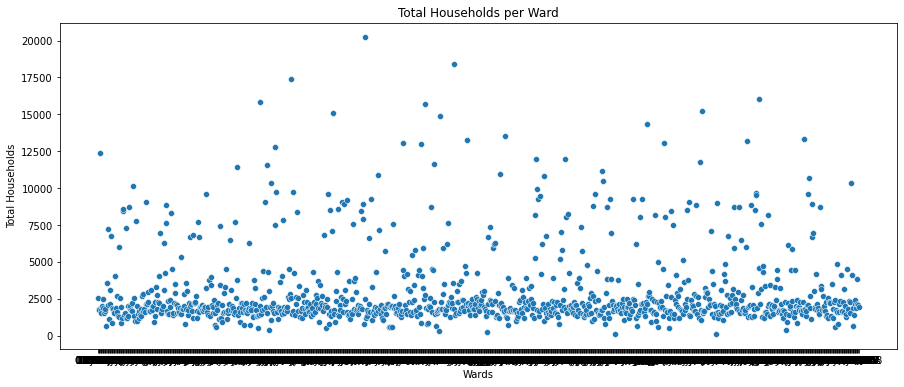

In [62]:
#Plotting a Scatter Plot for the Test data
plt.figure(figsize=(15,6))
sns.scatterplot(test['ward'], test['total_households'])
plt.xlabel("Wards")
plt.ylabel("Total Households")
plt.title("Total Households per Ward")

In [9]:
# The Above Scatter Plots shows us that our data contains data points that can demage model's perfomance. 
# By that we have to perfom data cleaning to boost model's perfomance.

In [64]:
#Dropping wards with greater or equal to 15000 of total households
train = train[train['total_households']<=15000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households vs Total Individuals')

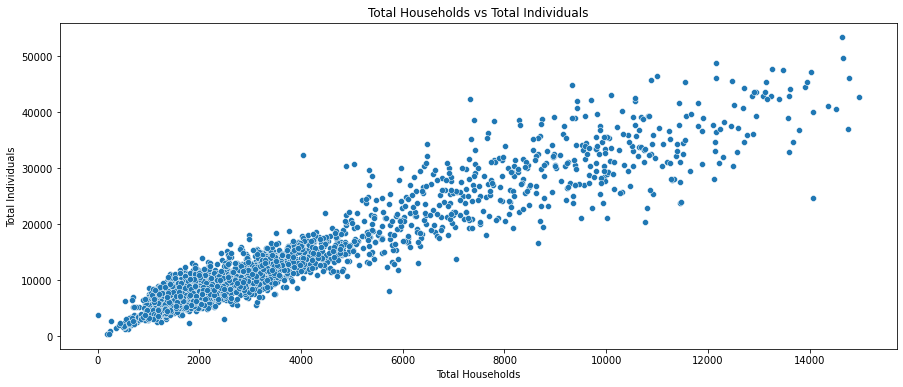

In [65]:
# comparing relationship between Total Households and Total Individuals
plt.figure(figsize=(15,6))
sns.scatterplot('total_households', 'total_individuals', data=train)
plt.xlabel("Total Households")
plt.ylabel("Total Individuals")
plt.title("Total Households vs Total Individuals")

In [66]:
#since our data is big, the graph is not clear and it is seen from it that they may be an outlier in between 0<total_households<2000

#creating a short copy for the first few values.
tr_copy = df.copy()
tr_copy = tr_copy[tr_copy['total_households']<=2000]
tr_copy

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0,0,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0,0,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964
8,BSJYBO9,1846.67063,6752.59784,22.837016,0.918951,0.076072,0.001948,0.000552,0.000000,0.000000,0.000000,0.001901,0.000000,0.000000,0.000000,0.000575,0,0,0.422909,0.428407,0.000158,0.019946,0.128580,0.068526,0.931474,0.118271,0.881729,0.008290,0.991710,0.000320,0.005139,0.000945,0.000000,0.001295,0.012386,0.033995,0.000163,0.000805,0.000964,0.006898,0.932699,0.004392,0,0.000000,0.998386,0.000322,0.001129,0.000163,0.000000,0.937336
10,DKGAH8I,598.31812,1266.29666,0.896916,0.679012,0.037881,0.077707,0.112421,0.059123,0.013006,0.009879,0.003008,0.000000,0.001893,0.002089,0.003982,0,0,0.197408,0.692447,0.000000,0.047857,0.062289,0.550123,0.449877,0.581647,0.418353,0.461431,0.538569,0.062137,0.522482,0.016653,0.006038,0.357876,0.000000,0.007526,0.002986,0.005100,0.000000,0.000000,0.000000,0.019202,0,0.000000,0.506309,0.027069,0.050786,0.406238,0.009598,0.956912
11,Z8L9FJ3,1783.91978,7431.50564,7.273949,0.967844,0.012623,0.002514,0.000560,0.000000,0.000000,0.002690,0.003097,0.006183,0.000000,0.000000,0.004491,0,0,0.398141,0.450026,0.000150,0.020773,0.130911,0.159649,0.840351,0.154980,0.845020,0.015046,0.984954,0.002339,0.003403,0.003230,0.000729,0.008319,0.952446,0.001463,0.002745,0.001441,0.000000,0.000299,0.002333,0.013719,0,0.007535,0.995864,0.000412,0.000606,0.000551,0.002567,0.933042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,NNSTKY7,1184.97775,3523.05659,0.675118,0.950444,0.001290,0.007980,0.000000,0.000868,0.000000,0.003870,0.008200,0.019831,0.002580,0.002694,0.002242,0,0,0.164371,0.687583,0.000000,0.008475,0.139570,0.178506,0.821494,0.296846,0.703154,0.270897,0.729103,0.922979,0.002840,0.000707,0.000000,0.000000,0.000352,0.001080,0.007018,0.001359,0.000000,0.000330,0.000000,0.000321,0,0.063013,0.022232,0.831829,0.000920,0.139849,0.005170,0.666039
3159,KULRO9E,1628.52750,7216.16800,35.765290,0.165778,0.806441,0.017789,0.000643,0.000000,0.000000,0.003220,0.001823,0.001292,0.000000,0.001720,0.001292,0,0,0.376873,0.400407,0.000316,0.037503,0.184901,0.039737,0.960263,0.087012,0.912988,0.026951,0.973049,0.000955,0.004979,0.018967,0.000338,0.960445,0.000959,0.000319,0.008110,0.004774,0.000000,0.000156,0.000000,0.000000,0,0.000000,0.998591,0.000313,0.000322,0.000774,0.000000,0.054709
3161,FVPNQVH,1429.44894,9373.71827,35.515447,0.849265,0.118752,0.009561,0.000000,0.000660,0.000000,0.001723,0.006892,0.001319,0.001099,0.004578,0.006150,0,0,0.424660,0.381892,0.000246,0.024408,0.168794,0.083841,0.916159,0.179145,0.820855,0.029753,0.970247,0.002660,0.008977,0.017716,0.002227,0.934051,0.002261,0.000481,0.003855,0.002966,0.001859,0.000000,0.002271,0.004461,0,0.016216,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households vs Total Individuals')

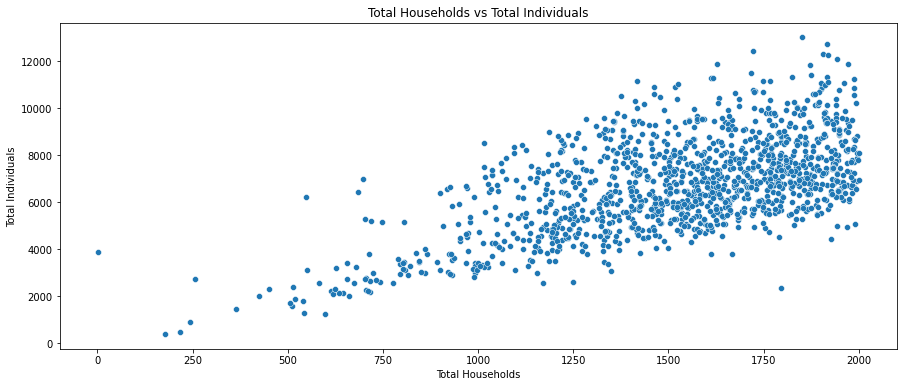

In [67]:
plt.figure(figsize=(15,6))
sns.scatterplot(tr_copy['total_households'], tr_copy['total_individuals'])
plt.xlabel("Total Households")
plt.ylabel("Total Individuals")
plt.title("Total Households vs Total Individuals")

In [68]:
# It looks like we do have an outlier and in some point, it's doesn't make sense.
# Displaying the outlier
train[train.total_households<175]

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
1094,W0TZK41,1.0,3867.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0.001293,0.0,0.0,0.998707,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001552,0.0,0.0,0.0,0.0,0.0,0,0.998448,0.952935,0.019136,0.006465,0.019912,0.001552,1.0


In [69]:
#Dropping The Outlier
train = train[train.index!=1094]

In [19]:
# Creating New Variables we will work with during our model training

In [70]:
## Binned feature on total_households
train['total_householdslessthan5000'] = train['total_households'].apply(lambda x:1 if 2500<x<=5000  else 0)
test['total_householdslessthan5000'] = test['total_households'].apply(lambda x:1 if 2500<x<=5000  else 0)

In [71]:
train['Individualsperhouse'] = train['total_individuals'] / train['total_households']
test['Individualsperhouse'] = test['total_individuals'] / test['total_households']

In [72]:
train['Luxury_01'] = train['car_01']+train['stv_00']+train['psa_01']
train['Luxury_00'] = train['car_00'] +train['stv_01']+train['psa_00']

In [73]:
train['NoSchoolAttendace'] = train['psa_01'] + train['psa_02']+ train['psa_03']
test['NoSchoolAttendace'] = test['psa_01'] + test['psa_02']+ test['psa_03']

In [74]:
train['InformalDwellings'] = train['dw_02'] + train['dw_07'] + train['dw_06']
test['InformalDwellings'] = test['dw_02'] + test['dw_07'] + test['dw_06']

In [75]:
train['TraditionalVSInformalDwellings'] = np.absolute(train['dw_01'] - train['dw_08'])
test['TraditionalVSInformalDwellings'] = np.absolute(test['dw_01'] - test['dw_08'])

In [76]:
train['total_households']/=train['total_households'].max()
train['total_individuals']/=train['total_individuals'].max()

test['total_households']/=test['total_households'].max()
test['total_individuals']/=test['total_individuals'].max()

In [77]:
train['SAOldPeopleSesothoVSSetswana'] = np.absolute(train['lan_06'] - train['lan_07'])

test['SAOldPeopleSesothoVSSetswana'] = np.absolute(test['lan_06'] - test['lan_07'])

In [78]:
# Describing results are Data cleaning 
train.describe()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,total_householdslessthan5000,Individualsperhouse,Luxury_01,Luxury_00,NoSchoolAttendace,InformalDwellings,TraditionalVSInformalDwellings,SAOldPeopleSesothoVSSetswana
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.0,3142.0,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.0,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.218701,0.225300,10.321489,0.713380,0.098330,0.031444,0.005542,0.007905,0.006024,0.021782,0.037455,0.062680,0.006867,0.001132,0.007459,0.0,0.0,0.313621,0.524506,0.000526,0.033227,0.128119,0.226817,0.773183,0.246941,0.753059,0.094721,0.905279,0.099696,0.054878,0.027150,0.038706,0.287430,0.124082,0.101481,0.126564,0.004485,0.033943,0.025652,0.049897,0.011964,0.0,0.014073,0.863307,0.042207,0.017566,0.073344,0.003576,0.830950,0.265118,3.981202,1.504382,1.333746,0.558259,0.090681,0.140919,0.188131
std,0.177009,0.157243,12.779429,0.215883,0.189202,0.077275,0.017388,0.028402,0.023845,0.036186,0.056017,0.111467,0.016766,0.003038,0.015829,0.0,0.0,0.076931,0.085754,0.000803,0.023151,0.033971,0.173898,0.173898,0.191177,0.191177,0.128013,0.128013,0.209326,0.117384,0.085294,0.082538,0.374978,0.269444,0.213635,0.255758,0.004559,0.147583,0.133577,0.154073,0.020119,0.0,0.037421,0.248422,0.147233,0.074837,0.168985,0.010406,0.208031,0.441466,0.996544,0.119879,0.110570,0.088119,0.102085,0.197521,0.296820
min,0.011897,0.007537,0.000000,0.005552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.019419,0.134106,0.000000,0.003212,0.017142,0.004186,0.159514,0.018241,0.041328,0.002430,0.237387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692,0.000000,1.254742,0.659136,0.810875,0.160601,0.000858,0.000000,0.000000
25%,0.111242,0.130125,0.434672,0.594886,0.002987,0.002409,0.000000,0.000000,0.000000,0.002646,0.004562,0.002767,0.000182,0.000000,0.001964,0.0,0.0,0.258055,0.462903,0.000128,0.016927,0.110782,0.097606,0.690788,0.130952,0.723038,0.017173,0.885495,0.002737,0.009050,0.003856,0.001480,0.010016,0.001688,0.002319,0.003793,0.001622,0.000278,0.000300,0.000447,0.002462,0.0,0.000000,0.880501,0.000942,0.000844,0.000441,0.000619,0.788542,0.000000,3.321824,1.421019,1.259610,0.491062,0.027062,0.009156,0.003400
50%,0.150049,0.172184,3.787997,0.769949,0.011028,0.005774,0.000796,0.000593,0.000785,0.008282,0.015630,0.013447,0.001753,0.000382,0.004000,0.0,0.0,0.305505,0.535982,0.000327,0.026824,0.126434,0.173422,0.826578,0.175146,0.824854,0.038771,0.961229,0.007474,0.016989,0.008686,0.007377,0.044739,0.003944,0.014891,0.007868,0.002935,0.001210,0.001146,0.002909,0.006205,0.0,0.000086,0.989915,0.003064,0.001752,0.001194,0.001606,0.909951,0.000000,3.826590,1.505336,1.332034,0.568989,0.059968,0.050816,0.015117
75%,0.240070,0.247899,17.826008,0.886824,0.075992,0.027807,0.002507,0.002079,0.002884,0.024495,0.045743,0.070347,0.006448,0.001051,0.007662,0.0,0.0,0.373035,0.584918,0.000660,0.042601,0.140361,0.309212,0.902394,0.276962,0.869048,0.114505,0.982827,0.058908,0.035131,0.014238,0.036178,0.60

In [43]:
# After describing from above, we saw that there's something wrong wiith 3 columns, which are "dw_12", "dw_13" and "lan_13"
# Dropping those columns
train_copy = train.copy()
train = train_copy.drop(['dw_12', 'dw_13', 'lan_13'], axis=1)
train

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,Individualsperhouse,total_householdslessthan5000,Luxury_01,Luxury_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,0.044411,0.360511,0.004950,0.000848,0.006711,0.192690,0.626544,0.000396,0.071214,0.109157,0.275335,0.724665,0.343501,0.656499,0.326122,0.673878,0.012956,0.482007,0.009574,0.109440,0.299974,0.001880,0.015047,0.004691,0.003556,0.003843,0.000787,0.001723,0.027796,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259,2.875762,0,1.558378,1.260856
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,0.231013,0.289105,0.025454,0.000289,0.007050,0.165663,0.701452,0.000713,0.016803,0.115370,0.059933,0.940067,0.080532,0.919468,0.033706,0.966294,0.003241,0.013292,0.010543,0.233694,0.486355,0.029286,0.111983,0.011787,0.004042,0.010961,0.005768,0.041982,0.021312,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136,2.418731,0,1.680852,1.186263
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,0.132829,0.001320,0.002305,0.000849,0.006466,0.293674,0.534299,0.000397,0.027582,0.144048,0.169733,0.830267,0.108760,0.891240,0.056128,0.943872,0.008827,0.019836,0.004155,0.220034,0.077659,0.002389,0.560416,0.018953,0.010277,0.004701,0.002755,0.014786,0.005827,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315,3.061820,1,1.595272,1.232701
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333,4.613392,0,1.382581,1.453279
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964,5.350122,0,1.324831,1.499872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,HFWMU2J,703.70893,2757.17876,3.500868,0.816469,0.070643,0.003699,0.004518,0.000000,0.000000,0.001433,0.006391,0.049242,0.011097,0.012207,0.024301,0.215378,0.648514,0.000000,0.015256,0.120853,0.186006,0.813994,0.278325,0.721675,0.026363,0.973637,0.983206,0.005568,0.000422,0.000903,0.000481,0.001384,0.000903,0.001795,0.000903,0.000422,0.000873,0.000000,0.000962,0.002176,0.032270,0.924304,0.002366,0.035771,0.005288,0.691621,3.918067,0,1.556195,1.307697
3170,8LVBHRG,8265.55628,29868.09873,0.116460,0.913623,0.000397,0.001184,0.000270,0.000124,0.000862,0.025582,0.015723,0.037453,0.001375,0.000000,0.003407,0.292636,0.533827,0.000707,0.080066,0.092764,0.452699,0.547301,0.380879,0.619121,0.166724,0.833276,0.002240,0.021769,0.024921,0.008089,0.036519,0.054329,0.028624,0.743253,0.002812,0.007738,0.005607,0.050325,0.012501,0.001272,0.995016,0.001392,0.000869,0.000366,0.002357,0.980561,3.613562,0,1.605646,1.220817
3171,5WDYHUG,6338.67028,29458.48566,0.958828,0.758389,0.017707,0.037914,0.001091,0.001560,0.000168,0.010662,0.033981,0.132129,0.001966,0.000168,0.004266,0.235334,0.5654

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


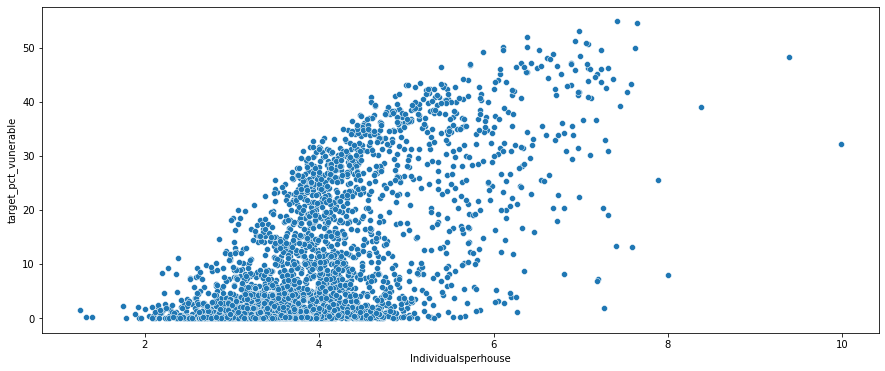

In [53]:
plt.figure(figsize=(15,6))
sns.scatterplot('Individualsperhouse', 'target_pct_vunerable', data=train)

In [36]:
#Looks like there is an outlier where IndividualsperHouse is greater than 10
# Dropping the outlier
to_drop = train.query('Individualsperhouse >= 10').index.tolist()

train = train.query('Individualsperhouse < 10')

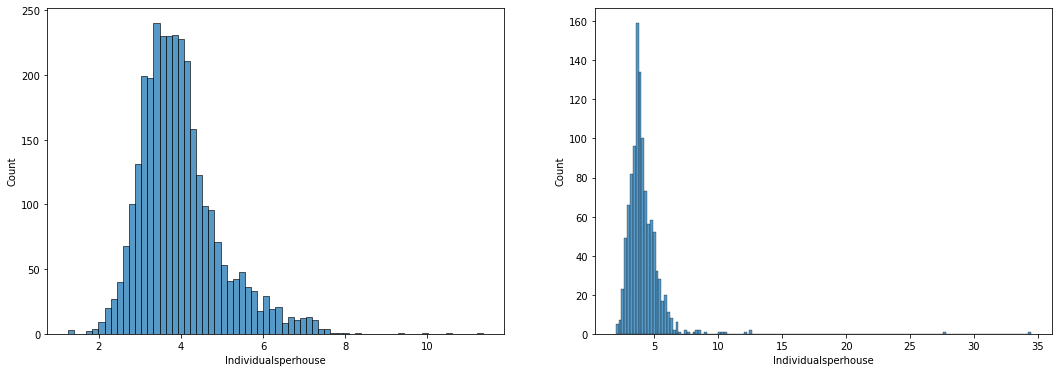

In [79]:
# Checking skewness of individuals per households
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
sns.histplot(train.Individualsperhouse, ax=axes[0])
sns.histplot(test.Individualsperhouse, ax=axes[1])

In [44]:
# Check the skew of all numerical features
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats = train.select_dtypes(['int','float']).apply(lambda x: skew(x)).sort_values(ascending=False).to_frame(name='skewness')
skewed_feats.sort_values(by='skewness', ascending=False)

,skewness
pg_04,21.616584
dw_11,17.571606
dw_10,10.357797
dw_05,9.295554
psa_02,8.288612
pg_02,7.781560
dw_09,7.230712
dw_02,6.569022
dw_03,6.491759
lan_02,6.476454


**K Means clustering, Target Encording and PCA to wrap it all up for some dimensionality reduction**

```
# This is formatted as code
```



In [80]:
### Applying Kmeans to almost all features and generating a 'cluster' feature.
train_copy=df.copy()
columns=train_copy.drop(["ward","target_pct_vunerable"],1).columns
train_copy=train_copy[columns]
km=KMeans(7,random_state=42)
km=km.fit(train_copy[columns])
train["cluster"]=km.predict(train[columns])
test["cluster"]=km.predict(test[columns])

In [81]:
target_mean = train.groupby(['cluster']).mean()[['target_pct_vunerable']]
for i in list(target_mean.columns):
  target_mean.rename({i:i+"_mean"},axis=1,inplace=True)
train = train.merge(target_mean,how="left",on='cluster')
test = test.merge(target_mean,how="left",on='cluster')

In [84]:
pca = PCA(random_state=42,n_components=1)
pg_features =  train.filter(regex='lan_.*')
train_pca = pca.fit_transform(pg_features)
train['pca_lan_0'] = train_pca[:,0]

In [85]:
pg_features =  test.filter(regex='lan_.*')
test_pca = pca.transform(pg_features)
test['pca_lan_0'] = test_pca[:,0]

In [86]:
target = train['target_pct_vunerable']

In [87]:
train = train.drop(['psa_00','psa_02','psa_03','psa_04','psa_01','lgt_00','stv_01','car_01','lln_01','ward','dw_12','dw_13','lan_13','target_pct_vunerable'], axis=1)
test = test.drop(['psa_00','psa_02','psa_03','psa_04','psa_01','lgt_00','stv_01','car_01','lln_01','ward','dw_12','dw_13','lan_13'], axis=1)

**Training our model with KFold splited into 4 sections using XGBoost**

In [ ]:
kf = KFold(n_splits=4,shuffle=False)
xgb = XGBRegressor(n_estimators=50000,random_state=42,max_depth=5,learning_rate=0.03888)
scores = []
pred_test = np.zeros(len(test))
for (train_index,test_index) in kf.split(train,target):
  X_train,X_test = train.iloc[train_index],train.iloc[test_index]
  y_train,y_test = target.iloc[train_index],target.iloc[test_index]
  xgb.fit(X_train,y_train,early_stopping_rounds=500,eval_set=[(X_test,y_test)],eval_metric='rmse')
  scores.append(metric(xgb.predict(X_test),y_test))
  pred_test+=xgb.predict(test)

Streaming output truncated to the last 5000 lines.
[170]	validation_0-rmse:5.95561
[171]	validation_0-rmse:5.95488
[172]	validation_0-rmse:5.9533
[173]	validation_0-rmse:5.95251
[174]	validation_0-rmse:5.95289
[175]	validation_0-rmse:5.95276
[176]	validation_0-rmse:5.95338
[177]	validation_0-rmse:5.95292
[178]	validation_0-rmse:5.95266
[179]	validation_0-rmse:5.95142
[180]	validation_0-rmse:5.95033
[181]	validation_0-rmse:5.94979
[182]	validation_0-rmse:5.95014
[183]	validation_0-rmse:5.9501
[184]	validation_0-rmse:5.9484
[185]	validation_0-rmse:5.94803
[186]	validation_0-rmse:5.94611
[187]	validation_0-rmse:5.94545
[188]	validation_0-rmse:5.94245
[189]	validation_0-rmse:5.94152
[190]	validation_0-rmse:5.94157
[191]	validation_0-rmse:5.94
[192]	validation_0-rmse:5.93941
[193]	validation_0-rmse:5.93858
[194]	validation_0-rmse:5.93693
[195]	validation_0-rmse:5.93498
[196]	validation_0-rmse:5.93314
[197]	validation_0-rmse:5.93234
[198]	validation_0-rmse:5.93196
[199]	validation_0-rmse:5.9